# HW 7: Question 2

**Boston house prices**

**Data Description**

Independent variable <br>
CRIM: Crime rate <br>
INDUS: Percentage of area of ​​non-retail commercial area <br>
NOX: nitrogen monoxide concentration <br>
RM: Number of rooms per house <br>
LSTAT: Percentage of lower classes in the population <br>
B: Percentage of black people in the population <br>
PTRATIO: Student/Teacher Ratio <br>
ZN: Percentage of residential area exceeding 25,000 square feet <br>
CHAS: 1 if located on the border of the Charles River, 0 otherwise. <br>
AGE: Percentage of homes built before 1940 <br>
RAD: Distance to radial highway <br>
DIS: Distance of job center <br>
TAX: Property tax rate <br>
<br>
Dependent variable <br>
Median 1978 home prices in 506 Boston towns ($1,000 per unit)

Divide the cluster into three by pulling the RM and AGE columns from the Boston house price data. 

The data is prepared in variable  data_X



Show results with 

(1) Kmeans with a plot including the data points and centroids

(2) hierarchical clustering with dendrogram



In [1]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 150
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
data_X = dfX[["RM", "AGE"]]


/Users/tt/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [2]:
data_X

,RM,AGE
0,6.575,65.2
1,6.421,78.9
2,7.185,61.1
3,6.998,45.8
4,7.147,54.2
...,...,...
501,6.593,69.1
502,6.120,76.7
503,6.976,91.0
504,6.794,89.3


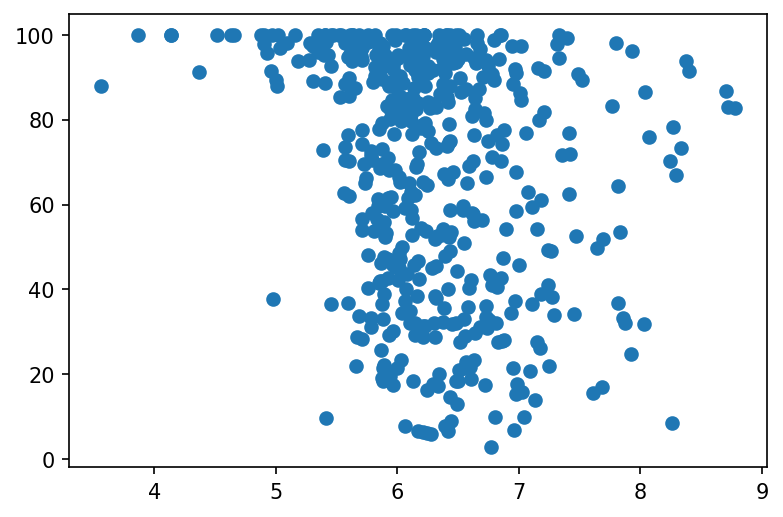

In [3]:
plt.scatter(data_X['RM'], data_X['AGE'])
# plt.savefig("scatter.jpg")

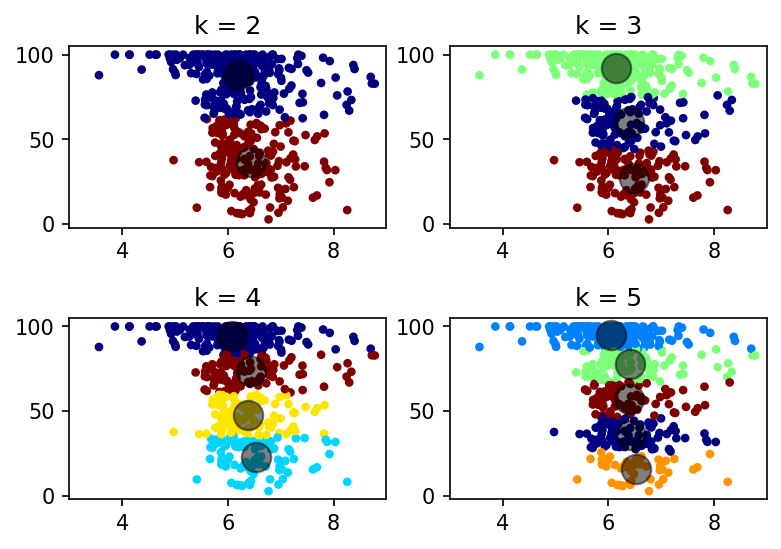

In [5]:
### Plot them 
### for k := 2 to 5
for i in range (2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_X)
    y_kmeans = kmeans.predict(data_X)
    plt.subplot(2, 2, i-1)
    plt.scatter(data_X['RM'], data_X['AGE'],c=y_kmeans, s=10, cmap='jet')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title(f"k = {i}")
    plt.xlim(3,9)
    plt.subplots_adjust(hspace=.5)
# plt.savefig("Kmeans.jpg")

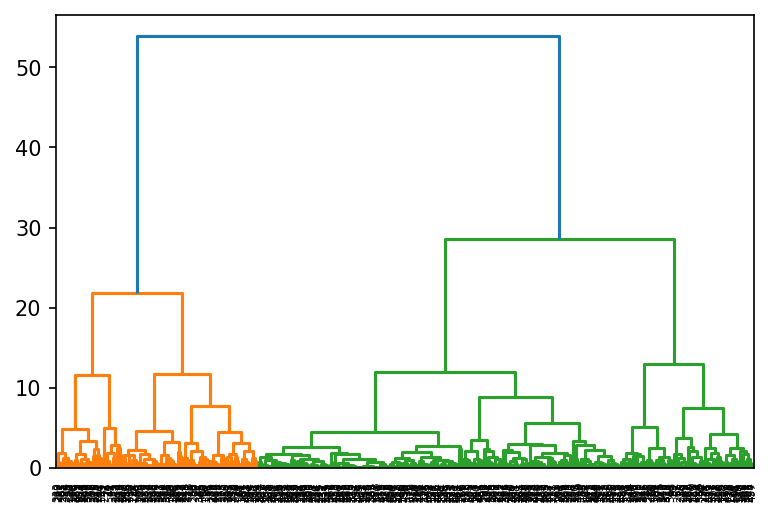

In [9]:
clustered_data  = sch.linkage(data_X, method = "average")
dendrogram = sch.dendrogram(clustered_data)
# plt.savefig("dendrogram.jpg")

In [ ]:
#### To predict


cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
#cluster.fit_predict(X)
cluster.fit_predict(np.array([[-1, 8], [-1, 2], [1, 4], [2, 1]]))